<h1>NAMA    : Moammer Kayada Kamal
    NIM     : 2209106039
    Kelas   : Informatika A2 2022 <h1>

<h1></h1>link dataset
https://drive.google.com/file/d/1GTT-9sbey8zlqMAcwvW_e7P7idnlR78O/view?usp=drive_link<h1>

<h1>Kita import semua library yang kita mau pakai, setelah itu kita panggil csv nya dan kita tampilkan<h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

yada = pd.read_csv('Loan_Default.csv')
yada.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


<h1> kita jadikan "Gender" index agar mudah menggunakan ".loc" nantinya<h1>

In [2]:
yada.set_index('Gender', inplace=True)
yada.head()

,ID,year,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
Gender,,,,,,,,,,,,,,,,,,,,,
Sex Not Available,24890,2019,cf,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
Male,24891,2019,cf,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
Male,24892,2019,cf,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
Male,24893,2019,cf,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
Joint,24894,2019,cf,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
yada.loc['Male','Region']

Gender
Male    North
Male    south
Male    North
Male    North
Male    North
        ...  
Male    North
Male    North
Male    North
Male    south
Male    North
Name: Region, Length: 42346, dtype: object

<h1>kita membuat variabel "lokasi_nasabah" dan "client group' agar mudah memanggilnya saat membuat visualisasi data<h1>

In [4]:
Lokasi_nasabah = yada['Region'].value_counts()
Lokasi_nasabah

Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64

In [5]:
client_group = yada.groupby('Region').sum()
client_group.head()

,ID,year,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Security_Type,Status,dtir1
Region,,,,,,,,,,,,,,,,,,,,,
North,7408574352,150863718,cfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcf...,noprenopreprepreprenoprenoprenoprenoprenopreno...,type2type1type1type1type1type1type2type2type2t...,p1p4p1p1p3p4p3p3p4p4p4p1p3p1p3p3p3p1p4p1p1p1p4...,l1l1l1l1l1l1l2l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1...,nopcnopcnopcnopcnopcnopcnopcnopcnopcnopcnopcno...,b/cnob/cnob/cnob/cnob/cnob/cb/cb/cb/cnob/cnob/...,24697733000,...,492574800.0,EQUIEXPCRIFEXPEXPCIBEXPCRIFCRIFCIBEXPCRIFCRIFC...,52274389,EXPCIBEXPEXPEXPCIBCIBEXPEXPCIBCIBEXPCIBCIBEXPC...,55-6445-5425-3435-4455-6455-6455-6465-7455-643...,to_instnot_instnot_instnot_instto_instto_instt...,4.947441e+06,directdirectdirectdirectdirectdirectdirectdire...,16821,2374506.0
North-East,122857518,2493465,cfcfncfcfcfcfcfcfcfcfcfcfcfcfcfncfcfcfcfcfcfcf...,noprenoprenoprenoprenoprenoprenoprenoprenoprep...,type1type2type1type2type1type1type1type3type2t...,p3p3p4p1p4p3p4p4p3p3p3p1p1p1p3p4p3p4p3p4p3p1p4...,l1l1l1l1l1l1l1l1l1l1l2l1l1l1l2l1l1l1l1l1l1l1l1...,nopcnopcnopcnopcnopcnopcnopcnopcnopcnopcnopcno...,nob/cb/cnob/cb/cnob/cnob/cnob/cnob/cb/cb/cnob/...,381687500,...,6621780.0,CRIFCRIFCIBCRIFCRIFEXPCIBCIBEQUICRIFCIBCIBCRIF...,859941,CIBEXPCIBCIBCIBCIBEXPCIBEXPCIBCIBEXPEXPEXPCIBE...,45-5445-5445-5465-7455-6455-6435-44>74>7425-34...,to_instto_instnot_instto_instnot_instto_instto...,8.088170e+04,directdirectdirectdirectdirectdirectdirectdire...,376,39572.0
central,859993181,17559243,cfcfncfcfcfcfcfcfcfncfcfcfcfcfcfcfcfcfcfcfcfcf...,noprenoprepreprenoprenoprenoprenoprenoprenopre...,type1type1type1type2type2type1type1type2type3t...,p3p1p4p3p4p1p1p1p4p4p3p1p3p4p2p1p4p4p4p4p1p3p4...,l1l1l1l1l1l1l1l1l1l1l1l1l1l1l2l1l1l1l1l1l1l1l1...,nopcnopcnopcnopcnopcnopcnopcnopcnopcnopcnopcno...,nob/cnob/cnob/cb/cb/cnob/cnob/cb/cnob/cnob/cno...,2809970500,...,52140480.0,CIBCRIFEXPCIBCRIFEXPEXPCIBEXPCRIFCRIFCIBEXPEXP...,6080876,EXPCIBEXPCIBCIBEXPEXPEXPCIBEXPEXPEXPEXPCIBCIBC...,55-6455-6465-7435-4435-4435-4445-5455-6445-543...,to_instto_instto_instto_instto_instnot_instnot...,5.997696e+05,directdirectdirectdirectdirectdirectdirectdire...,2395,280677.0
south,6360281364,129248304,cfcfcfcfcfcfcfcfcfcfcfcfcfcfncfcfcfcfcfncfcfcf...,nopreprenoprenoprenopreprenoprenoprenoprenopre...,type1type1type3type1type1type1type1type1type3t...,p1p1p3p3p4p3p3p3p1p4p1p3p1p3p4p3p4p3p4p2p3p3p4...,l1l1l1l1l1l1l1l2l1l1l1l1l1l1l1l1l1l1l1l1l1l1l1...,nopcnopcnopcnopcnopcnopcnopcnopcnopcnopcnopcno...,nob/cnob/cnob/cnob/cnob/cnob/cnob/cnob/cnob/cn...,21337884000,...,419350860.0,EXPEXPCIBEXPCIBEXPCIBCIBEQUIEXPCIBEXPEXPEXPCRI...,44822440,CIBCIBEXPEXPEXPCIBCIBCIBEXPEXPEXPCIBCIBCIBEXPE...,25-3435-4455-6435-4455-6455-6465-7435-4445-542...,to_instto_instto_instto_instto_instto_instnot_...,4.088797e+06,directdirectdirectdirectdirectdirectdirectdire...,17047,2004844.0


<h1>menurut grafik batang dibawah dapat disimpulkan bahwa nasabah paling banyak berasal dari north atau utara<h1>

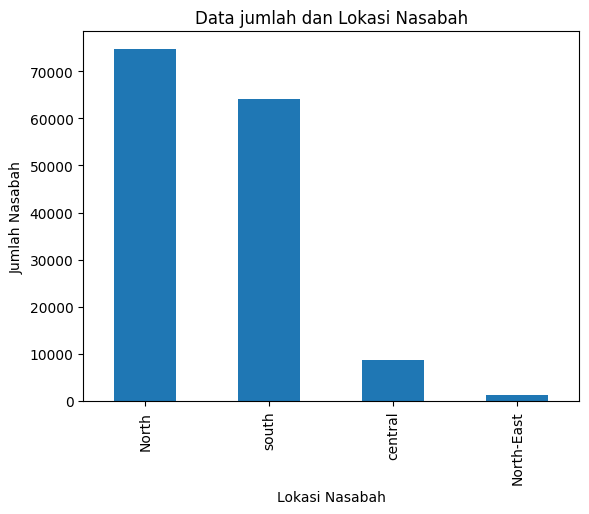

In [6]:
Lokasi_nasabah.plot.bar()
plt.title('Data jumlah dan Lokasi Nasabah')
plt.xlabel('Lokasi Nasabah')
plt.ylabel('Jumlah Nasabah') 
plt.show()

<h1>menurut grafik histogram dibawah dapat disimpulkan bahwa nasabah paling banyak berasal dari north atau utara (persis seperti grafik batang diatas)<h1>

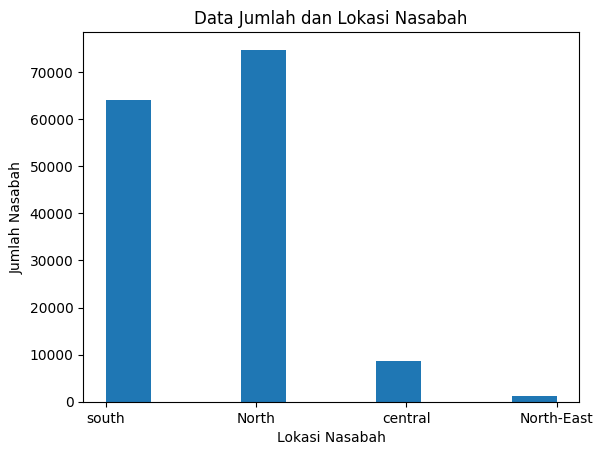

In [12]:
plt.hist(yada['Region'])
plt.title('Data Jumlah dan Lokasi Nasabah')
plt.xlabel('Lokasi Nasabah')
plt.ylabel('Jumlah Nasabah') 
plt.show()

In [8]:
yada

,ID,year,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
Gender,,,,,,,,,,,,,,,,,,,,,
Sex Not Available,24890,2019,cf,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
Male,24891,2019,cf,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
Male,24892,2019,cf,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
Male,24893,2019,cf,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
Joint,24894,2019,cf,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sex Not Available,173555,2019,cf,nopre,type1,p3,l1,nopc,nob/c,436500,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
Male,173556,2019,cf,nopre,type1,p1,l1,nopc,nob/c,586500,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
Male,173557,2019,cf,nopre,type1,p4,l1,nopc,nob/c,446500,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0


<h1>Berdasarkan dari grafik lingkaran(pie chart) menunjukkan bahwa nasabah dari wilayah north sebesar 50.3%, nasabah dari wilayah south sebesar 43.1%, nasabah dari wilayah centra sebesar 5.8%, dan nasabah dari wilayah north-east sebesar 0.8%<h1>

Text(0.5, 1.0, 'Total nasabah jika dikonversi ke persenan')

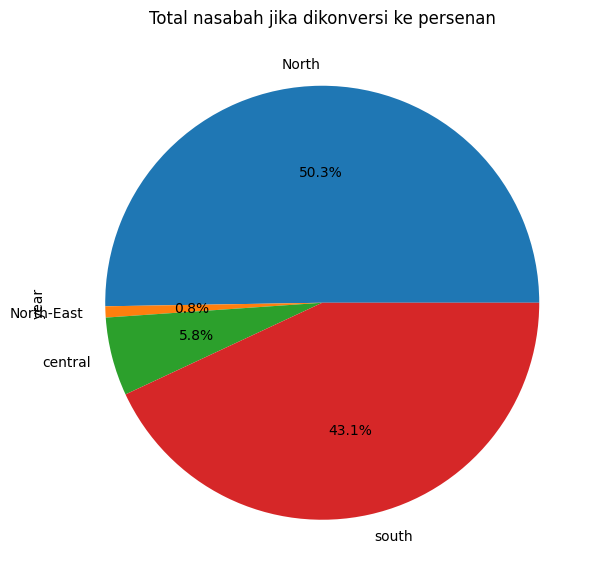

In [9]:
plt.figure(figsize=(7,12))
client_group['year'].plot.pie(autopct='%.1f%%')
plt.title('Total nasabah jika dikonversi ke persenan')

In [10]:
kayada_corr = yada.loc[:, 'Status':'dtir1'].corr()
kayada_corr

,Status,dtir1
Status,1.000000,0.078083
dtir1,0.078083,1.000000


<h1> mohon maaf jika heatmapnya tidak bagus karna versi matplotlib yang saya gunakan tidak mendukung, saya telah mencoba menanggulanginya tapi tetap saja tidak bisa<h1>

<Axes: >

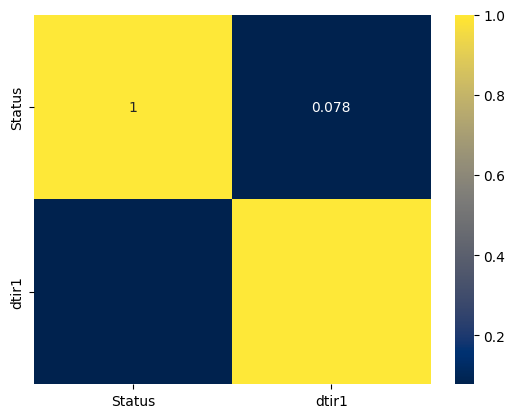

In [11]:
sns.heatmap(kayada_corr , annot=True, cmap='cividis')